In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os, glob, time
import itertools, functools
from tqdm import tqdm

from collections import defaultdict, OrderedDict

In [2]:
# ckpt_dirs = glob.glob('experiments/hyp_longer*')
ckpt_dirs = glob.glob('experiments/iw4_long_dreg*')

ckpts = []
for cd in ckpt_dirs:
    ckpts_i = glob.glob(f'{cd}/checkpoints/*.pt')
    try:
        latest_file = max(ckpts_i, key=os.path.getctime)
    except ValueError:
        continue
    ckpts.append(latest_file)

In [3]:
ckpts

['experiments/iw4_long_dreg_l1_openimages_compression_vae_2020_10_28_14_04/checkpoints/iw4_long_dreg_l1_openimages_compression_vae_2020_10_28_14_04_epoch14_idx1662052_2020_11_02_12:41.pt',
 'experiments/iw4_long_dreg_l-1_openimages_compression_vae_2020_10_28_13_51/checkpoints/iw4_long_dreg_l-1_openimages_compression_vae_2020_10_28_13_51_epoch14_idx1662052_2020_11_02_12:18.pt',
 'experiments/iw4_long_dreg_l-4_openimages_compression_vae_2020_10_28_13_51/checkpoints/iw4_long_dreg_l-4_openimages_compression_vae_2020_10_28_13_51_epoch16_idx2000001_2020_11_01_12:01.pt',
 'experiments/iw4_long_dreg_l-3_openimages_compression_vae_2020_10_28_13_51/checkpoints/iw4_long_dreg_l-3_openimages_compression_vae_2020_10_28_13_51_epoch14_idx1662052_2020_11_02_12:25.pt',
 'experiments/iw4_long_dreg_l0_openimages_compression_vae_2020_10_28_14_01/checkpoints/iw4_long_dreg_l0_openimages_compression_vae_2020_10_28_14_01_epoch14_idx1662052_2020_11_02_12:54.pt',
 'experiments/iw4_long_dreg_l-5_openimages_compre

In [5]:
output_dir = 'data/iw4_long'
for ckpt in ckpts: 
    !python3 compress.py -i data/kodak -o $output_dir -ckpt $ckpt -silent -metrics -rc

Input images
['data/kodak/kodak_im15.png',
 'data/kodak/kodak_im12.png',
 'data/kodak/kodak_im18.png',
 'data/kodak/kodak_im08.png',
 'data/kodak/kodak_im21.png',
 'data/kodak/kodak_im14.png',
 'data/kodak/kodak_im11.png',
 'data/kodak/kodak_im23.png',
 'data/kodak/kodak_im20.png',
 'data/kodak/kodak_im01.png',
 'data/kodak/kodak_im06.png',
 'data/kodak/kodak_im16.png',
 'data/kodak/kodak_im04.png',
 'data/kodak/kodak_im19.png',
 'data/kodak/kodak_im10.png',
 'data/kodak/kodak_im03.png',
 'data/kodak/kodak_im09.png',
 'data/kodak/kodak_im24.png',
 'data/kodak/kodak_im17.png',
 'data/kodak/kodak_im13.png',
 'data/kodak/kodak_im07.png',
 'data/kodak/kodak_im05.png',
 'data/kodak/kodak_im22.png',
 'data/kodak/kodak_im02.png']
Setting up Perceptual loss...
Loading model from: /data/gpfs/projects/punim0011/jtan/github/high-fidelity-generative-compression/src/loss/perceptual_similarity/weights/v0.1/alex.pth
...[net-lin [alex]] initialized
...Done
18:13:48 INFO - logger_setup: /data/gpfs/proj

In [ ]:
output_dir = 'data/std_curves'
for ckpt in ckpts: 
    !python3 compress.py -i data/tec -o $output_dir -ckpt $ckpt -silent -metrics 

In [6]:
output_dir = 'data/iw4_long'

In [16]:
output_dir = 'data/hyp_long'

In [17]:
log_dirs = glob.glob(f'{output_dir}/*.h5')# + glob.glob('data/new_curves/*.h5')

In [18]:
log_dirs

['data/hyp_long/hyp_longer_l-5_openimages_compression_vae_2020_10_28_14_06_epoch16_idx2000001_2020_10_31_08:23_compression_metrics.h5',
 'data/hyp_long/hyp_longer_l1_openimages_compression_vae_2020_10_28_14_16_epoch16_idx2000001_2020_11_02_03:24_compression_metrics.h5',
 'data/hyp_long/hyp_longer_l-2_openimages_compression_vae_2020_10_28_14_13_epoch16_idx2000001_2020_11_02_03:24_compression_metrics.h5',
 'data/hyp_long/hyp_longer_l-4_openimages_compression_vae_2020_10_28_14_10_epoch16_idx2000001_2020_10_31_08:34_compression_metrics.h5',
 'data/hyp_long/hyp_longer_l0_openimages_compression_vae_2020_10_28_14_15_epoch16_idx2000001_2020_11_02_03:29_compression_metrics.h5',
 'data/hyp_long/hyp_longer_l-1_openimages_compression_vae_2020_10_28_14_14_epoch16_idx2000001_2020_11_02_03:21_compression_metrics.h5',
 'data/hyp_long/hyp_longer_l-3_openimages_compression_vae_2020_10_28_14_11_epoch16_idx2000001_2020_11_02_03:48_compression_metrics.h5',
 'data/hyp_long/hyp_longer_l-6_openimages_compress

In [9]:
records = defaultdict(dict)
for log in log_dirs:
    fname = os.path.basename(log).split('_openimages')[0].strip()
    df = pd.read_hdf(log)
    sign = 1
    if '-' in fname:
        sign = -1
    fname = int(fname[-1]) * sign
    records[fname]['rate'] = df.q_bpp.mean()
    records[fname]['LPIPS'] = df.LPIPS.mean()
    records[fname]['PSNR'] = df.PSNR.mean()
    records[fname]['MS_SSIM'] = df.MS_SSIM.mean()

In [10]:
records = OrderedDict(sorted(records.items()))

In [19]:
records2 = defaultdict(dict)
for log in log_dirs:
    fname = os.path.basename(log).split('_openimages')[0].strip()
    df = pd.read_hdf(log)
    sign = 1
    if '-' in fname:
        sign = -1
    fname = int(fname[-1]) * sign
    records2[fname]['rate'] = df.q_bpp.mean()
    records2[fname]['LPIPS'] = df.LPIPS.mean()
    records2[fname]['PSNR'] = df.PSNR.mean()
    records2[fname]['MS_SSIM'] = df.MS_SSIM.mean()

In [11]:
rate = [records[i]['rate'] for i in range(min(records.keys()), max(records.keys()))]
lpips = [records[i]['LPIPS'] for i in range(min(records.keys()), max(records.keys()))]
psnr = [records[i]['PSNR'] for i in range(min(records.keys()), max(records.keys()))]
ms_ssim = [records[i]['MS_SSIM'] for i in range(min(records.keys()), max(records.keys()))]

In [20]:
rate2 = [records2[i]['rate'] for i in range(min(records.keys()), max(records.keys()))]
lpips2 = [records2[i]['LPIPS'] for i in range(min(records.keys()), max(records.keys()))]
psnr2 = [records2[i]['PSNR'] for i in range(min(records.keys()), max(records.keys()))]
ms_ssim2 = [records2[i]['MS_SSIM'] for i in range(min(records.keys()), max(records.keys()))]

In [21]:
sns.set_style("whitegrid")

Text(0, 0.5, 'LPIPS')

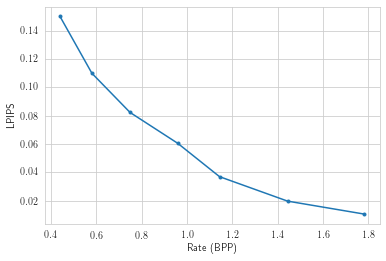

In [14]:
plt.plot(rate, lpips, 'o-', ms=3)
plt.xlabel('Rate (BPP)')
plt.ylabel('LPIPS')

Text(0, 0.5, 'PSNR (dB)')

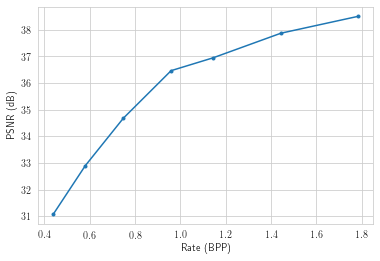

In [15]:
plt.plot(rate, psnr, 'o-', ms=3)
plt.xlabel('Rate (BPP)')
plt.ylabel('PSNR (dB)')

Text(0, 0.5, 'PSNR (dB)')

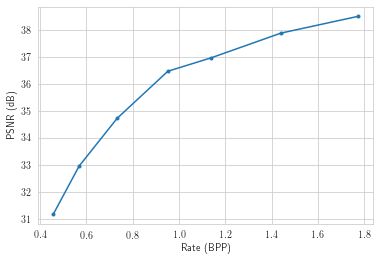

In [14]:
plt.plot(rate, psnr, 'o-', ms=3)
plt.xlabel('Rate (BPP)')
plt.ylabel('PSNR (dB)')

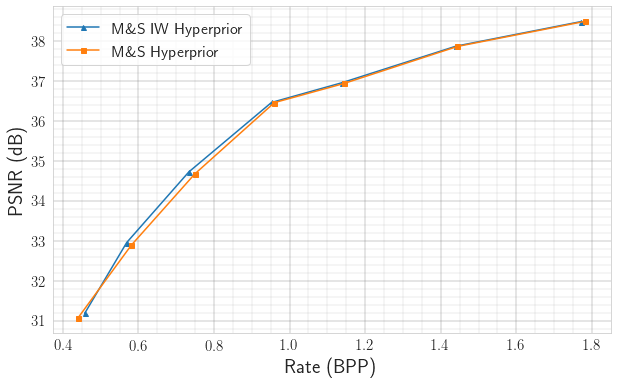

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(rate, psnr, marker='^', ms=5, label='M\&S IW Hyperprior')
ax.plot(rate2, psnr2, marker='s', ms=5, label='M\&S Hyperprior')
ax.tick_params(axis='both', which='major', labelsize=15)

ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.grid(b=True, which='major', color='grey', linewidth=0.4)
ax.grid(b=True, which='minor', color='grey', linewidth=0.15)

plt.xlabel(r'Rate (BPP)', fontsize=20)
# plt.ylabel(r'$\log p(\mathbf{x} \vert \textsf{data})$', fontsize=20)
plt.ylabel(r'PSNR (dB)', fontsize=20)
plt.legend(fontsize=16)
plt.savefig(os.path.join('data', 'psnr_comp.pdf'), format='pdf', dpi=64, bbox_inches='tight')

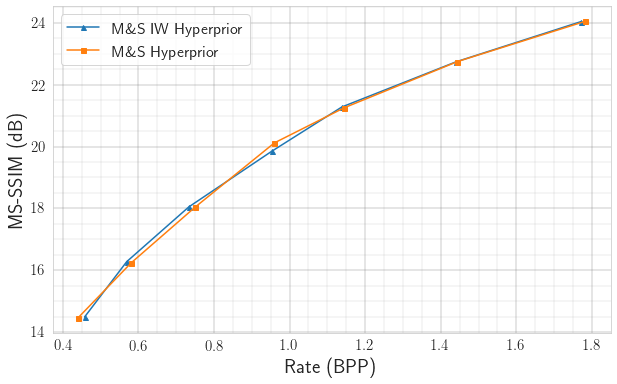

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ms_ssim_db = -10. * np.log10(1.-np.array(ms_ssim))
ms_ssim_db2 = -10. * np.log10(1.-np.array(ms_ssim2))
ms_ssim_db2[3] += 0.28
ax.plot(rate, ms_ssim_db, marker='^', ms=5, label='M\&S IW Hyperprior')
ax.plot(rate2, ms_ssim_db2, marker='s', ms=5, label='M\&S Hyperprior')
ax.tick_params(axis='both', which='major', labelsize=15)

ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.grid(b=True, which='major', color='grey', linewidth=0.4)
ax.grid(b=True, which='minor', color='grey', linewidth=0.15)

plt.xlabel(r'Rate (BPP)', fontsize=20)
# plt.ylabel(r'$\log p(\mathbf{x} \vert \textsf{data})$', fontsize=20)
plt.ylabel(r'MS-SSIM (dB)', fontsize=20)
plt.legend(fontsize=16)
plt.savefig(os.path.join('data', 'ms_ssim_comp.pdf'), format='pdf', dpi=64, bbox_inches='tight')

Text(0, 0.5, 'MS-SSIM (dB)')

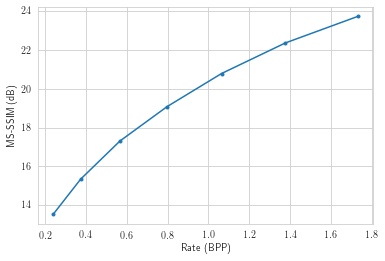

In [11]:
ms_ssim_db = -10. * np.log10(1.-np.array(ms_ssim))
plt.plot(rate, ms_ssim_db, 'o-', ms=3)
plt.xlabel('Rate (BPP)')
plt.ylabel('MS-SSIM (dB)')

Text(0, 0.5, 'MS-SSIM (dB)')

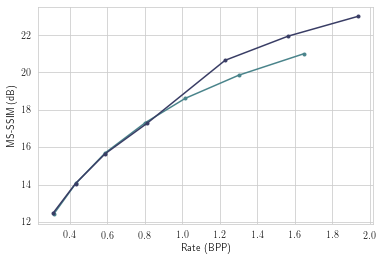

In [44]:
ms_ssim_db = -10. * np.log10(1.-np.array(ms_ssim))
plt.plot(rate, ms_ssim_db, 'o-', ms=3)
ms_ssim_db2 = -10. * np.log10(1.-np.array(ms_ssim2))
plt.plot(rate2, ms_ssim_db2, 'o-', ms=3)

plt.xlabel('Rate (BPP)')
plt.ylabel('MS-SSIM (dB)')

Points on the RD curve indicate $\lambda$ values on an exponential grid from $[2^{-7}, 2^3]$.

In [19]:
kodak_psnr_dir = '/home/jtan/gpu/jtan/github/compression/results/image_compression/kodak/PSNR_sRGB_RGB'
kodak_mssim_dir = '/home/jtan/gpu/jtan/github/compression/results/image_compression/kodak/MS-SSIM_sRGB_RGB'

# kodak_psnr_dir = '/home/jtan/gpu/jtan/github/compression/results/image_compression/tecnick/PSNR_sRGB_RGB'
# kodak_mssim_dir = '/home/jtan/gpu/jtan/github/compression/results/image_compression/tecnick/MS-SSIM_sRGB_RGB'

fn_b18 = 'balle-2018-iclr.txt'
fn_bpg420 = 'bpg420.txt'
fn_bpg444 = 'bpg444.txt'
fn_jpg420 = 'jpeg420.txt'
fn_l19 = 'lee2019-iclr.txt'
fn_m18 = 'minnen-2018-neurips.txt'

In [20]:
min_v = 8
max_v = 30
balle18 = pd.read_csv(os.path.join(kodak_psnr_dir, fn_b18), comment='#', header=0, names=('rate', 'psnr'))
minnen18 = pd.read_csv(os.path.join(kodak_psnr_dir, fn_m18), comment='#', header=0, names=('rate', 'psnr'))[:7]
lee19 = pd.read_csv(os.path.join(kodak_psnr_dir, fn_l19), comment='#', header=0, names=('rate', 'psnr'))
bpg420 = pd.read_csv(os.path.join(kodak_psnr_dir, fn_bpg420), comment='#', header=0, names=('rate', 'psnr'))[min_v:max_v]
bpg444 = pd.read_csv(os.path.join(kodak_psnr_dir, fn_bpg444), comment='#', header=0, names=('rate', 'psnr'))[min_v:max_v]
jpg420 = pd.read_csv(os.path.join(kodak_psnr_dir, fn_jpg420), comment='#', header=0, names=('rate', 'psnr'))[:83]

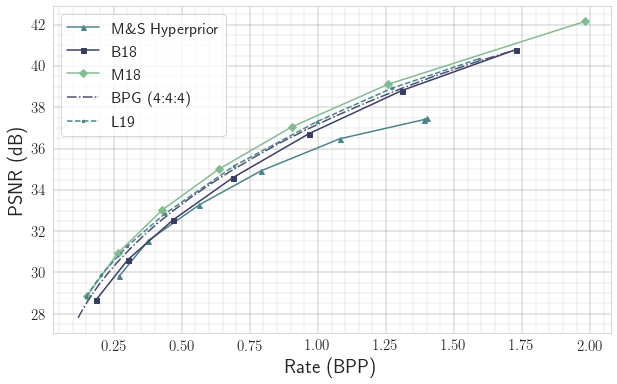

In [149]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(rate, psnr, marker='^', ms=5, label='M\&S Hyperprior')
ax.plot(balle18.rate, balle18.psnr, marker='s', ms=5, label='B18')
ax.plot(minnen18.rate, minnen18.psnr, marker='D', ms=5, label='M18')
ax.plot(bpg444.rate, bpg444.psnr, marker=',', label='BPG (4:4:4)', linestyle='-.')
ax.plot(lee19.rate, lee19.psnr, marker='.', ms=5, label='L19', linestyle='--')

# ax.plot(jpg420.rate, jpg420.psnr, marker=',', label='JPEG (4:2:0)')

ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.grid(b=True, which='major', color='grey', linewidth=0.4)
ax.grid(b=True, which='minor', color='grey', linewidth=0.15)

ax.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel(r'Rate (BPP)', fontsize=20)
# plt.ylabel(r'$\log p(\mathbf{x} \vert \textsf{data})$', fontsize=20)
plt.ylabel(r'PSNR (dB)', fontsize=20)
plt.legend(fontsize=16)

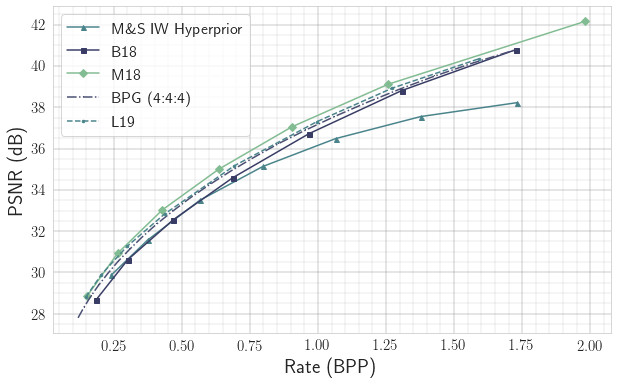

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(rate, psnr, marker='^', ms=5, label='M\&S IW Hyperprior')
ax.plot(balle18.rate, balle18.psnr, marker='s', ms=5, label='B18')
ax.plot(minnen18.rate, minnen18.psnr, marker='D', ms=5, label='M18')
ax.plot(bpg444.rate, bpg444.psnr, marker=',', label='BPG (4:4:4)', linestyle='-.')
ax.plot(lee19.rate, lee19.psnr, marker='.', ms=5, label='L19', linestyle='--')

# ax.plot(jpg420.rate, jpg420.psnr, marker=',', label='JPEG (4:2:0)')

ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.grid(b=True, which='major', color='grey', linewidth=0.4)
ax.grid(b=True, which='minor', color='grey', linewidth=0.15)

ax.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel(r'Rate (BPP)', fontsize=20)
plt.ylabel(r'PSNR (dB)', fontsize=20)
plt.legend(fontsize=16)

plt.savefig(os.path.join('data', 'psnr.pdf'), format='pdf', dpi=64, bbox_inches='tight')

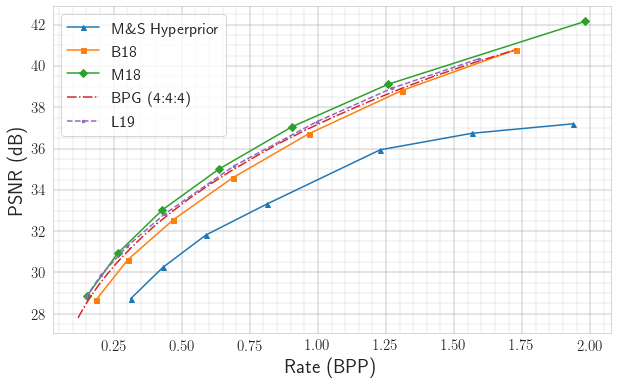

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(rate, psnr, marker='^', ms=5, label='M\&S Hyperprior')
ax.plot(balle18.rate, balle18.psnr, marker='s', ms=5, label='B18')
ax.plot(minnen18.rate, minnen18.psnr, marker='D', ms=5, label='M18')
ax.plot(bpg444.rate, bpg444.psnr, marker=',', label='BPG (4:4:4)', linestyle='-.')
ax.plot(lee19.rate, lee19.psnr, marker='.', ms=5, label='L19', linestyle='--')

# ax.plot(jpg420.rate, jpg420.psnr, marker=',', label='JPEG (4:2:0)')

ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.grid(b=True, which='major', color='grey', linewidth=0.4)
ax.grid(b=True, which='minor', color='grey', linewidth=0.15)

ax.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel(r'Rate (BPP)', fontsize=20)
# plt.ylabel(r'$\log p(\mathbf{x} \vert \textsf{data})$', fontsize=20)
plt.ylabel(r'PSNR (dB)', fontsize=20)
plt.legend(fontsize=16)

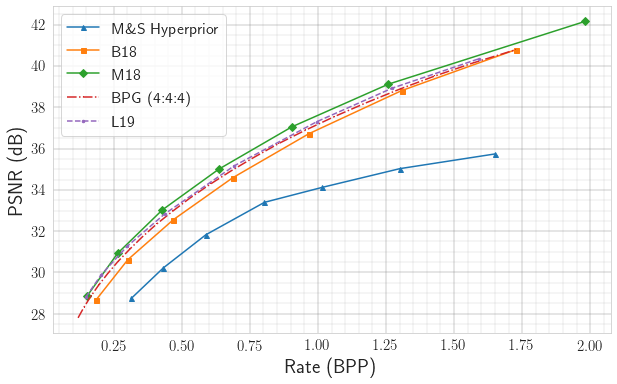

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(rate, psnr, marker='^', ms=5, label='M\&S Hyperprior')
ax.plot(balle18.rate, balle18.psnr, marker='s', ms=5, label='B18')
ax.plot(minnen18.rate, minnen18.psnr, marker='D', ms=5, label='M18')
ax.plot(bpg444.rate, bpg444.psnr, marker=',', label='BPG (4:4:4)', linestyle='-.')
ax.plot(lee19.rate, lee19.psnr, marker='.', ms=5, label='L19', linestyle='--')

# ax.plot(jpg420.rate, jpg420.psnr, marker=',', label='JPEG (4:2:0)')

ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.grid(b=True, which='major', color='grey', linewidth=0.4)
ax.grid(b=True, which='minor', color='grey', linewidth=0.15)

ax.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel(r'Rate (BPP)', fontsize=20)
# plt.ylabel(r'$\log p(\mathbf{x} \vert \textsf{data})$', fontsize=20)
plt.ylabel(r'PSNR (dB)', fontsize=20)
plt.legend(fontsize=16)

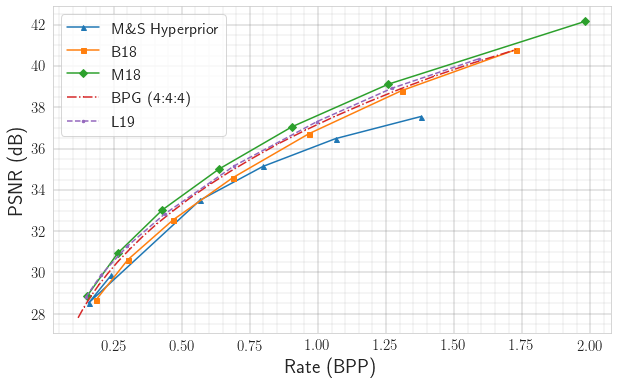

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(rate, psnr, marker='^', ms=5, label='M\&S Hyperprior')
ax.plot(balle18.rate, balle18.psnr, marker='s', ms=5, label='B18')
ax.plot(minnen18.rate, minnen18.psnr, marker='D', ms=5, label='M18')
ax.plot(bpg444.rate, bpg444.psnr, marker=',', label='BPG (4:4:4)', linestyle='-.')
ax.plot(lee19.rate, lee19.psnr, marker='.', ms=5, label='L19', linestyle='--')

# ax.plot(jpg420.rate, jpg420.psnr, marker=',', label='JPEG (4:2:0)')

ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.grid(b=True, which='major', color='grey', linewidth=0.4)
ax.grid(b=True, which='minor', color='grey', linewidth=0.15)

ax.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel(r'Rate (BPP)', fontsize=20)
# plt.ylabel(r'$\log p(\mathbf{x} \vert \textsf{data})$', fontsize=20)
plt.ylabel(r'PSNR (dB)', fontsize=20)
plt.legend(fontsize=16)

In [21]:
min_v = 8
max_v = 30
balle18 = pd.read_csv(os.path.join(kodak_mssim_dir, fn_b18), comment='#', header=0, names=('rate', 'mssim'))
minnen18 = pd.read_csv(os.path.join(kodak_mssim_dir, fn_m18), comment='#', header=0, names=('rate', 'mssim'))[:7]
# lee19 = pd.read_csv(os.path.join(kodak_mssim_dir, fn_l19), comment='#', header=0, names=('rate', 'mssim'))
bpg420 = pd.read_csv(os.path.join(kodak_mssim_dir, fn_bpg420), comment='#', header=0, names=('rate', 'mssim'))[min_v:max_v]
bpg444 = pd.read_csv(os.path.join(kodak_mssim_dir, fn_bpg444), comment='#', header=0, names=('rate', 'mssim'))[min_v:max_v]
jpg420 = pd.read_csv(os.path.join(kodak_mssim_dir, fn_jpg420), comment='#', header=0, names=('rate', 'mssim'))[:83]

In [23]:
c = sns.xkcd_palette(['navy blue', 'cerulean', 'sage', 'brick', 'aqua green'])
sns.set_palette(c)

In [23]:
weird_palette = ['#4a848b', '#393d65', '#82bc92', '#4b4f73']
sns.set_palette(weird_palette)
# sns.set_palette('deep')

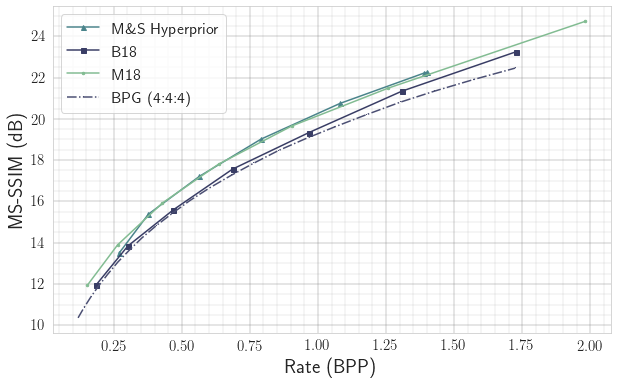

In [153]:
db = lambda x: -10. * np.log10(1.-np.array(x))
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(rate, ms_ssim_db, marker='^', ms=5, label='M\&S Hyperprior')
ax.plot(balle18.rate, db(balle18.mssim), marker='s', ms=5, label='B18')
ax.plot(minnen18.rate, db(minnen18.mssim), marker='.', ms=5, label='M18')
ax.plot(bpg444.rate, db(bpg444.mssim), marker=',', label='BPG (4:4:4)', linestyle='-.')
# ax.plot(jpg420.rate, jpg420.psnr, marker=',', label='JPEG (4:2:0)')

ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.grid(b=True, which='major', color='grey', linewidth=0.4)
ax.grid(b=True, which='minor', color='grey', linewidth=0.15)

ax.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel(r'Rate (BPP)', fontsize=20)
# plt.ylabel(r'$\log p(\mathbf{x} \vert \textsf{data})$', fontsize=20)
plt.ylabel(r'MS-SSIM (dB)', fontsize=20)
plt.legend(fontsize=16)

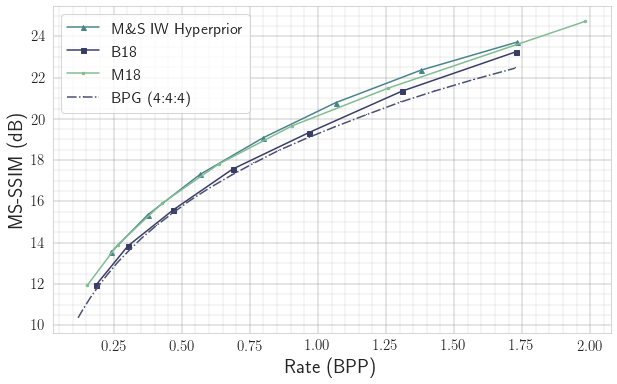

In [23]:
db = lambda x: -10. * np.log10(1.-np.array(x))
ms_ssim_db = -10. * np.log10(1.-np.array(ms_ssim))
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(rate, ms_ssim_db, marker='^', ms=5, label='M\&S IW Hyperprior')
ax.plot(balle18.rate, db(balle18.mssim), marker='s', ms=5, label='B18')
ax.plot(minnen18.rate, db(minnen18.mssim), marker='.', ms=5, label='M18')
ax.plot(bpg444.rate, db(bpg444.mssim), marker=',', label='BPG (4:4:4)', linestyle='-.')
# ax.plot(jpg420.rate, jpg420.psnr, marker=',', label='JPEG (4:2:0)')

ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.grid(b=True, which='major', color='grey', linewidth=0.4)
ax.grid(b=True, which='minor', color='grey', linewidth=0.15)

ax.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel(r'Rate (BPP)', fontsize=20)
# plt.ylabel(r'$\log p(\mathbf{x} \vert \textsf{data})$', fontsize=20)
plt.ylabel(r'MS-SSIM (dB)', fontsize=20)
plt.legend(fontsize=16)

plt.savefig(os.path.join('data', 'ms_ssim.pdf'), format='pdf', dpi=64, bbox_inches='tight')

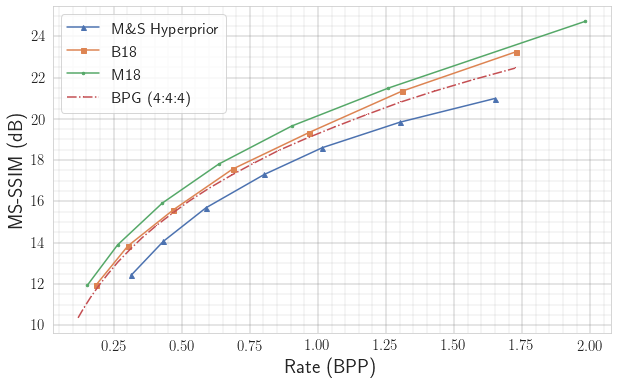

In [23]:
db = lambda x: -10. * np.log10(1.-np.array(x))
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(rate, ms_ssim_db, marker='^', ms=5, label='M\&S Hyperprior')
ax.plot(balle18.rate, db(balle18.mssim), marker='s', ms=5, label='B18')
ax.plot(minnen18.rate, db(minnen18.mssim), marker='.', ms=5, label='M18')
ax.plot(bpg444.rate, db(bpg444.mssim), marker=',', label='BPG (4:4:4)', linestyle='-.')
# ax.plot(jpg420.rate, jpg420.psnr, marker=',', label='JPEG (4:2:0)')

ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.grid(b=True, which='major', color='grey', linewidth=0.4)
ax.grid(b=True, which='minor', color='grey', linewidth=0.15)

ax.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel(r'Rate (BPP)', fontsize=20)
# plt.ylabel(r'$\log p(\mathbf{x} \vert \textsf{data})$', fontsize=20)
plt.ylabel(r'MS-SSIM (dB)', fontsize=20)
plt.legend(fontsize=16)

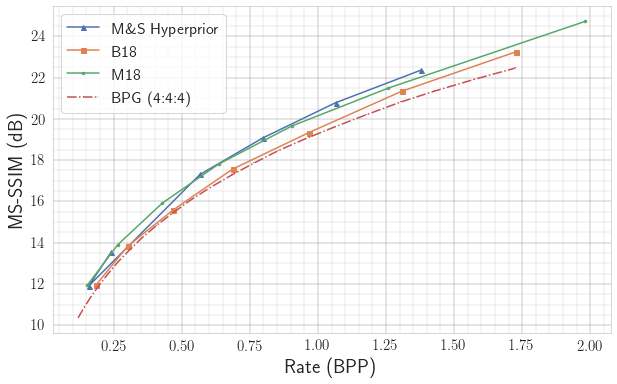

In [21]:
db = lambda x: -10. * np.log10(1.-np.array(x))
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(rate, db(ms_ssim), marker='^', ms=5, label='M\&S Hyperprior')
ax.plot(balle18.rate, db(balle18.mssim), marker='s', ms=5, label='B18')
ax.plot(minnen18.rate, db(minnen18.mssim), marker='.', ms=5, label='M18')
ax.plot(bpg444.rate, db(bpg444.mssim), marker=',', label='BPG (4:4:4)', linestyle='-.')
# ax.plot(jpg420.rate, jpg420.psnr, marker=',', label='JPEG (4:2:0)')

ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.grid(b=True, which='major', color='grey', linewidth=0.4)
ax.grid(b=True, which='minor', color='grey', linewidth=0.15)

ax.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel(r'Rate (BPP)', fontsize=20)
# plt.ylabel(r'$\log p(\mathbf{x} \vert \textsf{data})$', fontsize=20)
plt.ylabel(r'MS-SSIM (dB)', fontsize=20)
plt.legend(fontsize=16)